## Classification and Cluster 

### Importing Basic Libraries and Libraries used for Classification and Clustering 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Importing updated.csv dataset for Data Analysis and Machine Learning (Classification and Clustering)

In [2]:
updatedDF = pd.read_csv('Updated.csv')
updatedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571960 entries, 0 to 571959
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     571960 non-null  int64  
 1   index                          571960 non-null  int64  
 2   totalviews/channelelapsedtime  571960 non-null  float64
 3   channelId                      571960 non-null  object 
 4   categoryID                     571960 non-null  int64  
 5   channelViewCount               571960 non-null  int64  
 6   likes/subscriber               571960 non-null  float64
 7   views/subscribers              571960 non-null  float64
 8   videoCount                     571960 non-null  int64  
 9   subscriberCount                571960 non-null  int64  
 10  videoId                        571960 non-null  object 
 11  dislikes/views                 571960 non-null  float64
 12  channelelapsedtime            

In [3]:
updatedDF

,Unnamed: 0,index,totalviews/channelelapsedtime,channelId,categoryID,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,...,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount,Title,GenreCount,convertedVideoPublished,dateDifference
0,120670,262638,49.738858,UCSDmaD_BkAd3qoW0j4LqXzQ,10,2879283,0.014061,3.905294,40,2418,...,0,0.000000,1190.770471,0.179007,2011-09-29T16:45:17.000Z,1,Music,111095,2011-09-29,4141
1,100636,158192,0.035413,UCYucBgYf4Hdz1kHHZg4rqbQ,10,3330,1.000000,1205.000000,23,2,...,3,1.500000,1665.000000,0.026856,2007-07-11T16:47:38.000Z,1,Music,111095,2007-07-11,5682
2,100648,158261,70.534381,UCruWhWewzCr0qEUpNfuUpNA,10,4956592,0.002019,0.378924,108,5447,...,0,0.000000,909.967322,0.032837,2010-08-04T09:53:32.000Z,0,Music,111095,2010-08-04,4562
3,100646,158250,9.896746,UC09YqmrublMSzu1XjVnTZTA,10,911619,0.043590,4.641026,198,390,...,0,0.000000,2337.484615,0.062431,2014-06-15T09:01:24.000Z,0,Music,111095,2014-06-15,3151
4,100645,158242,19.907081,UCsD53Ezi1d7mhfEYtSGPU4Q,10,1841823,0.093071,11.968976,264,967,...,1,0.001034,1904.677353,0.153534,2009-02-27T17:59:40.000Z,36,Music,111095,2009-02-27,5085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571955,571860,383918,499.482957,UCSe_WS9HEDxwpdvQedtlm6A,44,21745490,-1.000000,0.523983,1276,19993,...,-1,-1.000000,1087.655179,0.316075,2013-12-24T09:13:12.000Z,-1,Trailers,217,2013-12-24,3324
571956,571959,250728,82.779967,UC_yO4y9sfYmOT8zn54X467Q,30,6969411,0.003587,0.925480,119,8642,...,4,0.000463,806.458111,0.213622,2013-06-28T10:34:29.000Z,4,Movies,4,2013-06-28,3503
571957,571957,214423,1128.737554,UCUC0f5Lu42bIi9IClnYP4zw,30,58405396,-1.000000,-1.000000,111,145507,...,-1,-1.000000,401.392345,-0.000023,2012-11-13T08:01:09.000Z,-1,Movies,4,2012-11-13,3730
571958,571956,23521,12.978112,UCs4YNRnEubfBG2NfUR0j3fA,30,566261,0.118522,12.549678,46,6522,...,5,0.000767,86.823214,2.146240,2013-05-30T06:02:23.000Z,14,Movies,4,2013-05-30,3532


## K-Means Clustering Algorithm

### Filtering dataframe for K-means clustering
---
(Predictor Variable): dateDifference
(Response Variable): videoViewCount

In [4]:
df = pd.DataFrame(updatedDF[['videoViewCount', 'dateDifference']])
df.head()

,videoViewCount,dateDifference
0,9443,4141
1,2410,5682
2,2064,4562
3,1810,3151
4,11574,5085


### Elbow Plot to find the optimal K value for K-means clustering algorithm
--- 
Elbow region is where the optimal K-value resides for the K-means clustering algorithm.
The optimal K-value refers to the optimal number of clusters of the data points. 

In [5]:
SSE = []
kRange = range(1,10)
for k in kRange:
    km = KMeans(n_clusters=k)
    km.fit(df[['videoViewCount','dateDifference']])
    SSE.append(km.inertia_)

C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\clust

### Plotting out the Elbow Plot
---
The plot is K-value (number of clusters) vs sum of squared error. 
That is the the optimal K-value is when sum of squared error is at its lowest point before a steady decrement in sum of squared error.

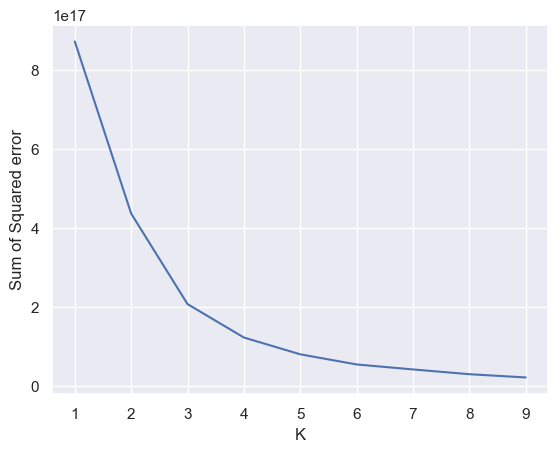

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(kRange,SSE)

### Results from above Elbow plot
---
From the above Elbow plot, the optimal K-value is 3. 
This means that the data points are best sorted in 3 clusters. 

---

### Data Visualisation of dateDifference vs videoViewCount (before Clustering)

Text(0, 0.5, 'videoViewCount')

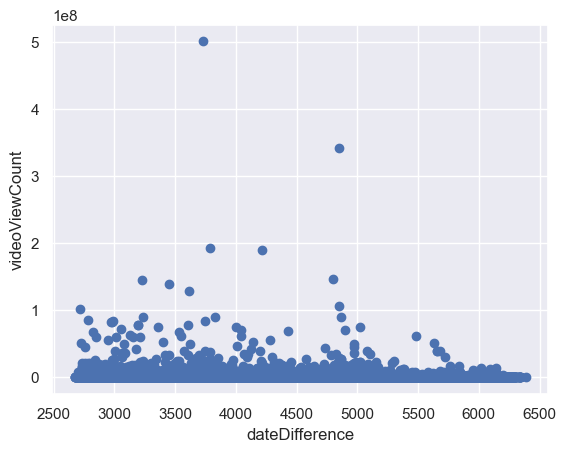

In [7]:
#Scatter Plot of the two variables before clustering 
plt.scatter(df.dateDifference,df['videoViewCount'])
plt.xlabel('dateDifference')
plt.ylabel('videoViewCount')

### K-Means Clustering Implementation
---
> Setting km as KMeans method with optimal K-value as 3 (i.e. n_clusters =3)
---
> using km.fit.predict to predict which data points belong to which clusters from clusters 0 to 2

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['dateDifference','videoViewCount']])
y_predicted

C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [9]:
#Checking DataFrame to see updated datapoints with cluster 
df['Clusters'] = y_predicted
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571960 entries, 0 to 571959
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   videoViewCount  571960 non-null  int64
 1   dateDifference  571960 non-null  int64
 2   Clusters        571960 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 10.9 MB


,videoViewCount,dateDifference,Clusters
0,9443,4141,0
1,2410,5682,0
2,2064,4562,0
3,1810,3151,0
4,11574,5085,0
...,...,...,...
571955,10476,3324,0
571956,7998,3503,0
571957,-1,3730,0
571958,81849,3532,0


### Using the km.clusters_centers_ to generate number of clusters and centroids 

In [10]:
Centre = km.cluster_centers_
Centre

array([[4.05890225e+03, 4.94232836e+04],
       [3.87600000e+03, 6.60532664e+07],
       [4.28600000e+03, 4.21312374e+08]])

In [11]:
#Sort and Filter DataFrames according to their clusters
#C0: cluster0
#C1: cluster1
#C2: cluster2
#sort dataframes according to clusters
C0 = df[df.Clusters==0]
C1 = df[df.Clusters==1]
C2 = df[df.Clusters==2]

### Data Visualisation of dateDifference vs videoViewCount (After Clustering)

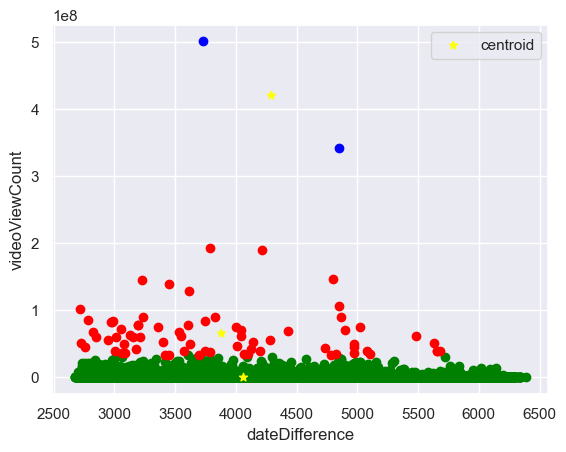

In [12]:
plt.scatter(C0.dateDifference,C0['videoViewCount'],color='green')
plt.scatter(C1.dateDifference,C1['videoViewCount'],color='red')
plt.scatter(C2.dateDifference,C2['videoViewCount'],color='blue')

plt.scatter(Centre[:,0],Centre[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('dateDifference')
plt.ylabel('videoViewCount')
plt.legend()

### Axes issue: Pre-Processing of DataFrames using Min-Max Scaler
---
Since the axes from above chart is not 1:1, we need to do some scaling. 
Hence, in this case, we implement the MinMaxScalar to transform the dataframes for videoViewCount and dateDifference

In [13]:
Scaler = MinMaxScaler()
#y-axis: response variable: videoViewCount
Scaler.fit(df[['videoViewCount']])
df['videoViewCount'] = Scaler.transform(df[['videoViewCount']])
#x-axis: predictor variable: dateDifference
Scaler.fit(df[['dateDifference']])
df['dateDifference'] = Scaler.transform(df[['dateDifference']])

In [14]:
df

,videoViewCount,dateDifference,Clusters
0,0.000019,0.395205,0
1,0.000005,0.810345,0
2,0.000004,0.508621,0
3,0.000004,0.128502,0
4,0.000023,0.649515,0
...,...,...,...
571955,0.000021,0.175108,0
571956,0.000016,0.223330,0
571957,0.000000,0.284483,0
571958,0.000163,0.231142,0


### Data Visualisation of dateDifference vs videoViewCount after scaling and before clustering 


Text(0, 0.5, 'videoViewCount')

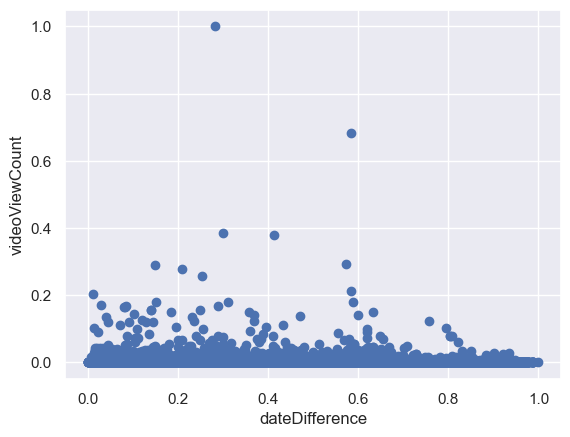

In [15]:
plt.scatter(df.dateDifference,df['videoViewCount'])
plt.xlabel('dateDifference')
plt.ylabel('videoViewCount')

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['dateDifference','videoViewCount']])
y_predicted

C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, ..., 2, 1, 1])

In [17]:
df['Clusters'] = y_predicted
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571960 entries, 0 to 571959
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   videoViewCount  571960 non-null  float64
 1   dateDifference  571960 non-null  float64
 2   Clusters        571960 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 10.9 MB


,videoViewCount,dateDifference,Clusters
0,0.000019,0.395205,2
1,0.000005,0.810345,0
2,0.000004,0.508621,2
3,0.000004,0.128502,1
4,0.000023,0.649515,0
...,...,...,...
571955,0.000021,0.175108,1
571956,0.000016,0.223330,1
571957,0.000000,0.284483,2
571958,0.000163,0.231142,1


From above, we can see that the data points are more appropriately sorted according to their clusters compared to the previous one before our MinMax scaling. 

---

In [18]:
Centre = km.cluster_centers_
Centre

array([[6.81304344e-01, 1.06410944e-04],
       [1.53152904e-01, 1.43043950e-04],
       [3.99270184e-01, 9.89514436e-05]])

In [19]:
#Sort and Filter DataFrames according to their clusters
#C0: cluster0
#C1: cluster1
#C2: cluster2
#sort dataframes according to clusters
C0 = df[df.Clusters==0]
C1 = df[df.Clusters==1]
C2 = df[df.Clusters==2]

### Data Visualisation of dateDifference vs videoViewCount after scaling and clustering

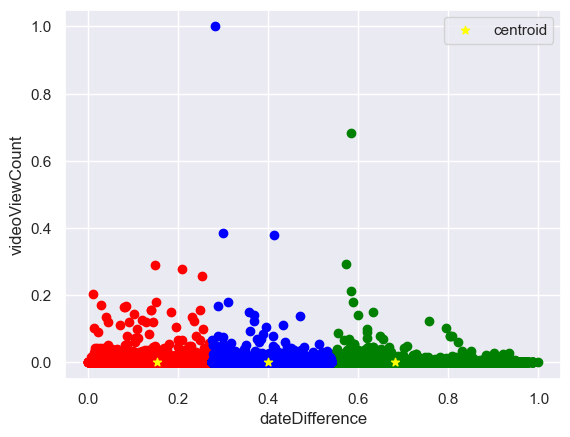

In [20]:
plt.scatter(C0.dateDifference,C0['videoViewCount'],color='green')
plt.scatter(C1.dateDifference,C1['videoViewCount'],color='red')
plt.scatter(C2.dateDifference,C2['videoViewCount'],color='blue')

plt.scatter(Centre[:,0],Centre[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('dateDifference')
plt.ylabel('videoViewCount')
plt.legend()

After minmax scaling, we review elbow plot again to determine if the optimal value k remains at 3
---

In [21]:
SSE = []
kRange = range(1,10)
for k in kRange:
    km = KMeans(n_clusters=k)
    km.fit(df[['videoViewCount','dateDifference']])
    SSE.append(km.inertia_)

C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\draco\anaconda3\lib\site-packages\sklearn\clust

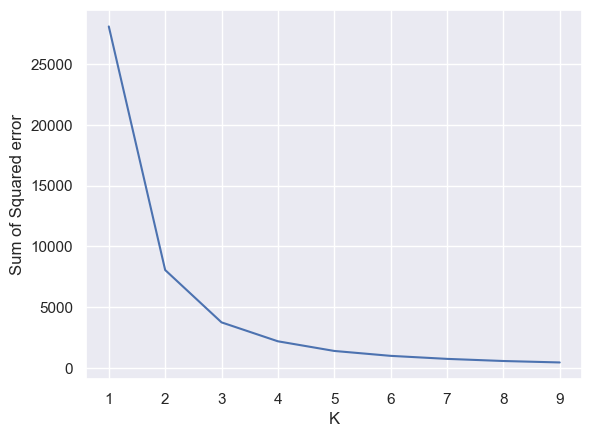

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(kRange,SSE)

From above elbow plot, we can see that the optimal K value remains at 3 despite the minmax scaling. 

## K-Nearest Neighbour (KNN) classification
---
- Here our predictor variable is dateDifference and response variable is videoViewCount. 

In [23]:
#import library and function KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)

In [24]:
#Response Variable
videoViewCount = pd.DataFrame(updatedDF['videoViewCount'])
#Predictor Variable
dateDifference = pd.DataFrame(updatedDF['dateDifference'])

In [25]:
# Split the Dataset into Train and Test
trainXDD, testXDD, trainYVC, testYVC = train_test_split(dateDifference, videoViewCount, test_size=0.2, random_state = 42)

In [26]:
#To be able to fit the train set and test set into the KNN.fit(trainXDD, train YVC)
#we need to convert dataframe to a numpy representation

trainXDD = trainXDD.values
trainYVC = trainYVC.values

testXDD = testXDD.values
testYVC = testYVC.values

### Fitting training model into K-Nearest-Neighbors and predict using the test model

In [27]:
KNN.fit(trainXDD, trainYVC)
YVC_predicted = KNN.predict(testXDD)

C:\Users\draco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: >

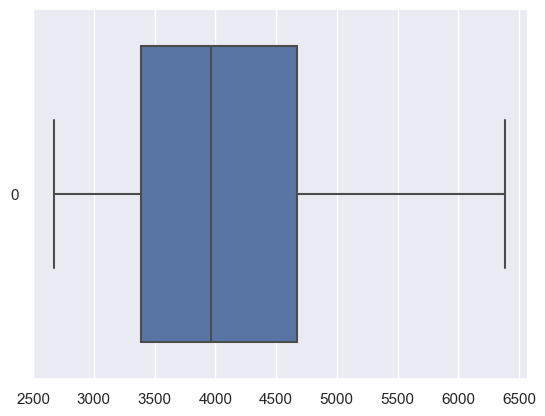

In [28]:
sb.boxplot(data= updatedDF['dateDifference'], orient='h')

<Axes: >

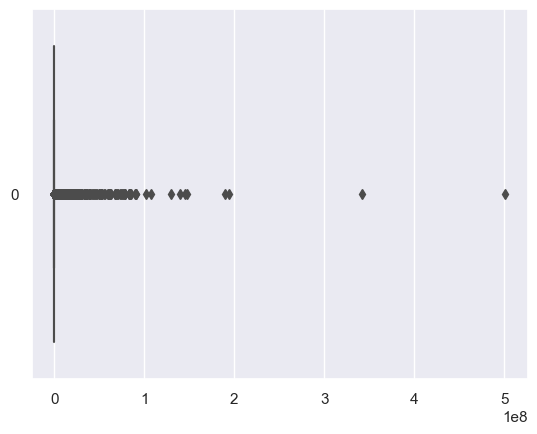

In [29]:
sb.boxplot(data= updatedDF['videoViewCount'], orient='h')

In [30]:
print("Trained Dataset:")
print("No. of rows for trained dataset for dateDifference: ",len(trainXDD))
print("No. of rows for trained dataset for videoViewCount: ",len(trainYVC))
print()
print("Test Dataset:")
print("No. of rows for test dataset for dateDifference: ",len(testXDD))
print("No. of rows for test dataset for videoViewCount: ",len(testYVC))

Trained Dataset:
No. of rows for trained dataset for dateDifference:  457568
No. of rows for trained dataset for videoViewCount:  457568

Test Dataset:
No. of rows for test dataset for dateDifference:  114392
No. of rows for test dataset for videoViewCount:  114392


### Checking the accuracy of model KNN between dateDifference and videoViewCount

In [31]:
print("Accuracy:", KNN.score(testXDD, testYVC))

Accuracy: 0.0006468983845024128


In [32]:
#Correlation Matrix of the two variables dateDifference and videoViewCount

print("Correlation of videoViewCount against dateDifference: \n",np.corrcoef(dateDifference['dateDifference'],videoViewCount['videoViewCount']),"\n")

Correlation of videoViewCount against dateDifference: 
 [[ 1.         -0.00897997]
 [-0.00897997  1.        ]] 



                dateDifference  videoViewCount
dateDifference         1.00000        -0.00898
videoViewCount        -0.00898         1.00000


<Axes: >

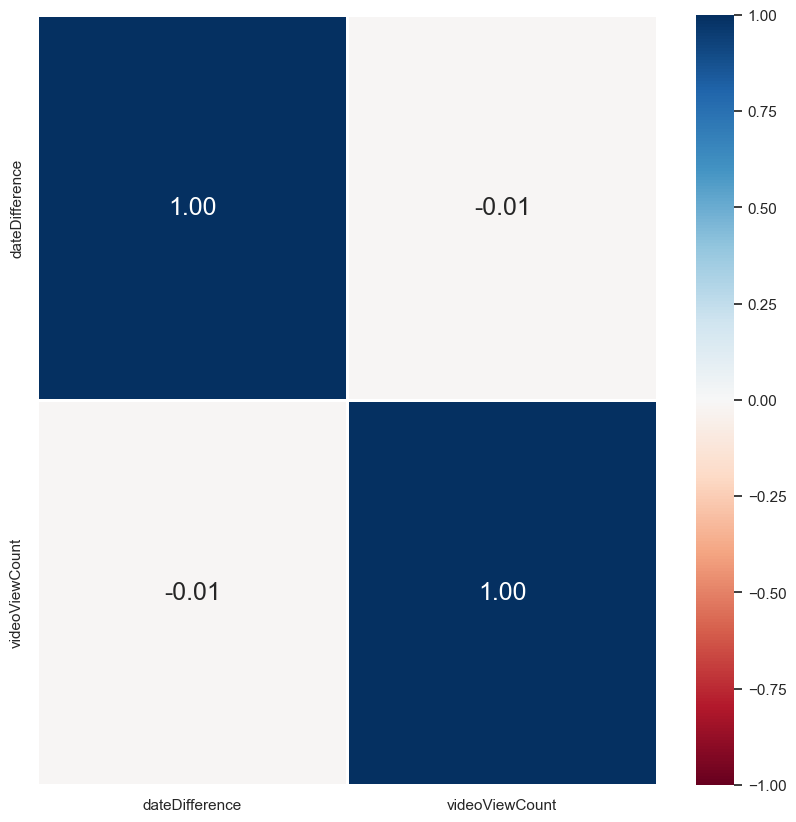

In [33]:
# Correlation Matrix
NDF = updatedDF[['dateDifference','videoViewCount']]
print(NDF.corr())
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(NDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [34]:
from sklearn.metrics import confusion_matrix
YVCPredicted = KNN.predict(testXDD)
ConMatrix= confusion_matrix(testYVC, YVCPredicted)
ConMatrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
#Classification Report for KNN Model
from sklearn.metrics import classification_report

print(classification_report(testYVC, YVCPredicted))

C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        15
        1002       0.00      0.00      0.00         1
        1003       0.00      0.00      0.00         3
        1004       0.00      0.00      0.00         2
        1005       0.00      0.00      0.00         3
        1006       0.00      0.00      0.00         3
        1007       0.00      0.00      0.00         5
        1008       0.03      0.25      0.05         4
        1009       0.00      0.00      0.00         3
        1010       0.00      0.00      0.00         5
        1011       0.01      0.14      0.01         7
        1012       0.00      0.00      0.00         4
        1013       0.00      0.00      0.00         5
        1014       0.00      0.00      0.00         8
        1015       0.00      0.00      0.00         4
        1016       0.00      0.00      0.00         6
        1017       0.00      0.00      0.00        11
        1018       0.00    

C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\draco\anaconda3\lib\site-packages\sklearn\metrics\_cla